In [2]:

import sys
!{sys.executable} -m pip install chaospy==3.2.0
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
import numpy
import chaospy
from scipy.integrate import odeint
from matplotlib import pyplot

     |████████████████████████████████| 236 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 28.5 MB 97 kB/s s eta 0:00:01     |████████████████████████████▋   | 25.5 MB 29.2 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 46.3 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 26.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 33.6 MB/s eta 0:00:01


In [3]:
class CoffeeCup:
    def __init__(self, time_points, max_time):
        self.time_points = time_points
        self.max_time = max_time

    def solve(self, T_0,kappa,T_env):
        time = numpy.linspace(0, self.time_points, self.max_time)  # Minutes

        # The equation describing the model
        def f(T, time, kappa, T_env):
            return -kappa * (T - T_env)

        # Solving the equation by integration
        temperature = odeint(f, T_0, time, args=(kappa, T_env))[:, 0]
        return temperature
    def exact(self, U_0, a):
        return U_0 * numpy.exp(a * self.x)

In [33]:
def run_solver(kappa, T_env):

    max_time, time_points, T_0 = 150, 200, 95
    model = CoffeeCup(time_points, max_time)
    solutions = model.solve(T_0, kappa, T_env)
    return [solutions[1],solutions[-1]]


In [34]:
order = 1
kappa_dist ,T_env_dist = chaospy.Uniform(0.025, 0.075), chaospy.Uniform(15, 25)
joint = chaospy.J(kappa_dist, T_env_dist)
ort = chaospy.orth_ttr(order,joint)
print(ort.round(1))

[1.0 q1-20.0 q0]


In [35]:
kappa_dist ,T_env_dist = chaospy.Uniform(0.025, 0.075), chaospy.Normal(15, 1)
joint = chaospy.J(kappa_dist, T_env_dist)
ort = chaospy.orth_ttr(order,joint)
print(ort.round(1))

[1.0 q1-15.0 q0]


nodes
[[ 0.03556624  0.03556624  0.06443376  0.06443376]
 [14.         16.         14.         16.        ]]
weigths
[0.25 0.25 0.25 0.25]


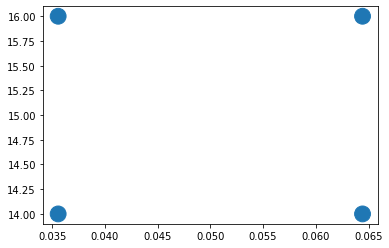

In [36]:
joint = chaospy.J(kappa_dist, T_env_dist)
nodes, weights = chaospy.generate_quadrature(order, joint, rule="gaussian")
print("nodes")
print(nodes)
print("weigths")
print(weights)
pyplot.scatter(*nodes, s=weights*1e3)

In [37]:
gauss_evals = numpy.array([run_solver(node[0],node[1]) for node in nodes.T])
quad = chaospy.fit_quadrature(ort, nodes, weights, gauss_evals)
quad.round(1)

polynomial([0.1*q1-100.4*q0+93.9, q1-2.2*q0+0.2])